<img src="https://nserc-hi-am.ca/2020/wp-content/uploads/sites/18/2019/12/McGill.png" width="500" height="400" align="center">

# Group Project
#### Arnaud Guzman-Annès | ID: 260882529
#### Ram Babu | ID: 260958970
#### Sophie Courtemanche-Martel | ID: 260743568
#### Duncan Wang | ID: 260710229
#### Jules Zielinski | ID: 260760796
<br><br>
**Date: February 22nd, 2021**
<br><br>
## Objective:

TED talks are video recordings of influential talks given at and hosted by TED Conferences LLC. TED was founded in 1984, and has since built a reputation for spreading inspiring powerful ideas in fields ranging from tech to science to education, with its videos having garnered over 1 billion views to date.

The goal of this project is to use various features associated with TED talks -- such as the topic, speaker, conference year, and length of the talk -- to predict the number of views a TED talk may receive.


# I - Data preprocessing

## Setup

First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed as well as Scikit-Learn (V ≥0.20).

In [136]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

import pandas as pd

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")
pd.options.mode.chained_assignment = None  # default='warn'

#display all columns
pd.set_option('display.max_columns', None)

# Get the data

## From GitHub repository

In [137]:
import pandas as pd
import requests
import io
    
# Downloading the csv file from my GitHub account
url = "https://raw.githubusercontent.com/McGill-MMA-EnterpriseAnalytics/TED/main/data/ted_main.csv"

download = requests.get(url).content

# Reading the downloaded content and turning it into a pandas dataframe
# We will use "churn" instead of "df" for replication purposes
df = pd.read_csv(io.StringIO(download.decode('utf-8')))

# Printing out the first 5 rows of the dataframe
df.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


# Data preprocessing

## About the original dataset

* **name:** The official name of the TED Talk. Includes the title and the speaker.
* **title:** The title of the talk
* **description:** A blurb of what the talk is about.
* **main_speaker:** The first named speaker of the talk.
* **speaker_occupation:** The occupation of the main speaker.
* **num_speaker:** The number of speakers in the talk.
* **duration:** The duration of the talk in seconds.
* **event:** The TED/TEDx event where the talk took place.
* **film_date:** The Unix timestamp of the filming.
* **published_date:** The Unix timestamp for the publication of the talk on TED.com
* **comments:** The number of first level comments made on the talk.
* **tags:** The themes associated with the talk.
* **languages:** The number of languages in which the talk is available.
* **ratings:** A stringified dictionary of the various ratings given to the talk (inspiring, fascinating, jaw dropping, etc.)
* **related_talks:** A list of dictionaries of recommended talks to watch next.
* **url:** The URL of the talk.
* **views:** The number of views on the talk.

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   comments            2550 non-null   int64 
 1   description         2550 non-null   object
 2   duration            2550 non-null   int64 
 3   event               2550 non-null   object
 4   film_date           2550 non-null   int64 
 5   languages           2550 non-null   int64 
 6   main_speaker        2550 non-null   object
 7   name                2550 non-null   object
 8   num_speaker         2550 non-null   int64 
 9   published_date      2550 non-null   int64 
 10  ratings             2550 non-null   object
 11  related_talks       2550 non-null   object
 12  speaker_occupation  2544 non-null   object
 13  tags                2550 non-null   object
 14  title               2550 non-null   object
 15  url                 2550 non-null   object
 16  views               2550

In [139]:
# Reorganize the columns for a better visualization

df = df[['name', 'title', 'description', 'main_speaker', 'speaker_occupation', 'num_speaker', 'duration', 'event', 'film_date', 'published_date', 'comments', 'tags', 'languages', 'ratings', 'related_talks', 'url', 'views']]
df.head()

,name,title,description,main_speaker,speaker_occupation,num_speaker,duration,event,film_date,published_date,comments,tags,languages,ratings,related_talks,url,views
0,Ken Robinson: Do schools kill creativity?,Do schools kill creativity?,Sir Ken Robinson makes an entertaining and pro...,Ken Robinson,Author/educator,1,1164,TED2006,1140825600,1151367060,4553,"['children', 'creativity', 'culture', 'dance',...",60,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,Al Gore: Averting the climate crisis,Averting the climate crisis,With the same humor and humanity he exuded in ...,Al Gore,Climate advocate,1,977,TED2006,1140825600,1151367060,265,"['alternative energy', 'cars', 'climate change...",43,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,David Pogue: Simplicity sells,Simplicity sells,New York Times columnist David Pogue takes aim...,David Pogue,Technology columnist,1,1286,TED2006,1140739200,1151367060,124,"['computers', 'entertainment', 'interface desi...",26,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,Majora Carter: Greening the ghetto,Greening the ghetto,"In an emotionally charged talk, MacArthur-winn...",Majora Carter,Activist for environmental justice,1,1116,TED2006,1140912000,1151367060,200,"['MacArthur grant', 'activism', 'business', 'c...",35,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,Hans Rosling: The best stats you've ever seen,The best stats you've ever seen,You've never seen data presented like this. Wi...,Hans Rosling,Global health expert; data visionary,1,1190,TED2006,1140566400,1151440680,593,"['Africa', 'Asia', 'Google', 'demo', 'economic...",48,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/hans_rosling_shows_t...,12005869


In [140]:
# Some more information about the dataset

display(df.shape)
display(df.isnull().sum())
display(df.describe())

(2550, 17)

name                  0
title                 0
description           0
main_speaker          0
speaker_occupation    6
num_speaker           0
duration              0
event                 0
film_date             0
published_date        0
comments              0
tags                  0
languages             0
ratings               0
related_talks         0
url                   0
views                 0
dtype: int64

,num_speaker,duration,film_date,published_date,comments,languages,views
count,2550.000000,2550.000000,2.550000e+03,2.550000e+03,2550.000000,2550.000000,2.550000e+03
mean,1.028235,826.510196,1.321928e+09,1.343525e+09,191.562353,27.326275,1.698297e+06
std,0.207705,374.009138,1.197391e+08,9.464009e+07,282.315223,9.563452,2.498479e+06
min,1.000000,135.000000,7.464960e+07,1.151367e+09,2.000000,0.000000,5.044300e+04
25%,1.000000,577.000000,1.257466e+09,1.268463e+09,63.000000,23.000000,7.557928e+05
50%,1.000000,848.000000,1.333238e+09,1.340935e+09,118.000000,28.000000,1.124524e+06
75%,1.000000,1046.750000,1.412964e+09,1.423432e+09,221.750000,33.000000,1.700760e+06
max,5.000000,5256.000000,1.503792e+09,1.506092e+09,6404.000000,72.000000,4.722711e+07


## Initial Observations

- There are 2550 rows and 17 columns.
- `speaker_occupation` column have 6 missing values.

In [141]:
# working on df_copy for the rest of data exploration

df_copy = df.copy()

In [142]:
# Filtering out the TED talks
df_copy = df_copy[df_copy['event'].str.contains('TED', regex=False, case=False, na=False)]
df_copy.shape

(2439, 17)

In [143]:
# Converting Duration to minutes
df_copy["duration"] = round(df_copy["duration"]/60,2)

In [144]:
df_copy.fillna('Unknown', inplace = True)

In [145]:
df_copy['languages'].describe()

count    2439.000000
mean       27.703977
std         9.205526
min         0.000000
25%        23.000000
50%        28.000000
75%        33.000000
max        72.000000
Name: languages, dtype: float64

Observations with zero languages are musicals

In [146]:
df_copy[df_copy['languages'] == 0].head(3)

,name,title,description,main_speaker,speaker_occupation,num_speaker,duration,event,film_date,published_date,comments,tags,languages,ratings,related_talks,url,views
58,"Pilobolus: A dance of ""Symbiosis""","A dance of ""Symbiosis""","Two Pilobolus dancers perform ""Symbiosis."" Doe...",Pilobolus,Dance company,1,13.75,TED2005,1109289600,1170979860,222,"['dance', 'entertainment', 'nature', 'performa...",0,"[{'id': 1, 'name': 'Beautiful', 'count': 1810}...","[{'id': 40, 'hero': 'https://pe.tedcdn.com/ima...",https://www.ted.com/talks/pilobolus_perform_sy...,3051507
115,"Ethel: A string quartet plays ""Blue Room""","A string quartet plays ""Blue Room""",The avant-garde string quartet Ethel performs ...,Ethel,String quartet,1,3.57,TED2006,1138838400,1182184140,27,"['cello', 'collaboration', 'culture', 'enterta...",0,"[{'id': 1, 'name': 'Beautiful', 'count': 216},...","[{'id': 103, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/ethel_performs_blue_...,384641
135,"Vusi Mahlasela: ""Woza""","""Woza""",After Vusi Mahlasela's 3-song set at TEDGlobal...,Vusi Mahlasela,"Musician, activist",1,4.98,TEDGlobal 2007,1181260800,1187695440,36,"['Africa', 'entertainment', 'guitar', 'live mu...",0,"[{'id': 8, 'name': 'Informative', 'count': 4},...","[{'id': 158, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/vusi_mahlasela_s_enc...,416603


In [147]:
#Indexing the rows
df_copy.reset_index(inplace=True)

In [148]:
from collections import defaultdict
rating_data = defaultdict(list)

In [149]:
import ast
rating_names = set()
for index, row in df_copy.iterrows():
    rating = ast.literal_eval(row['ratings'])
    for item in rating:
        rating_names.add(item['name'])

In [150]:
rating_names

{'Beautiful',
 'Confusing',
 'Courageous',
 'Fascinating',
 'Funny',
 'Informative',
 'Ingenious',
 'Inspiring',
 'Jaw-dropping',
 'Longwinded',
 'OK',
 'Obnoxious',
 'Persuasive',
 'Unconvincing'}

In [151]:
#Extracting ratings

rating_data = defaultdict(list)
for index, row in df_copy.iterrows():
    rating = ast.literal_eval(row['ratings'])
    rating_data['ID'].append(row['index'])
    names = set()
    for item in rating:
        rating_data[item['name']].append(item['count'])
        names.add(item['name'])

rating_data = pd.DataFrame(rating_data)

rating_data.head()

,ID,Funny,Beautiful,Ingenious,Courageous,Longwinded,Confusing,Informative,Fascinating,Unconvincing,Persuasive,Jaw-dropping,OK,Obnoxious,Inspiring
0,0,19645,4573,6073,3253,387,242,7346,10581,300,10704,4439,1174,209,24924
1,1,544,58,56,139,113,62,443,132,258,268,116,203,131,413
2,2,964,60,183,45,78,27,395,166,104,230,54,146,142,230
3,3,59,291,105,760,53,32,380,132,36,460,230,85,35,1070
4,4,1390,942,3202,318,110,72,5433,4606,67,2542,3736,248,61,2893


In [152]:
# Extracting tags

tags_data = defaultdict(list)
for index, row in df_copy.iterrows():
    tags = ast.literal_eval(row['tags'])
    for item in tags:
        tags_data['ID'].append(row['index'])
        tags_data['tags'].append(item)

tags_data = pd.DataFrame(tags_data)

In [153]:
tags_data[tags_data['ID']==1]

,ID,tags
7,1,alternative energy
8,1,cars
9,1,climate change
10,1,culture
11,1,environment
12,1,global issues
13,1,science
14,1,sustainability
15,1,technology


In [154]:
# Extracting related talks

df_copy['related_views'] = 0
df_copy['related_duration'] = 0
for index, row in df_copy.iterrows():
    rel = row['related_talks'].split(',')
    ctr1 = 0
    tot1 = 0
    ctr2 = 0
    tot2 = 0
    for views in rel:
        if 'viewed_count' in views:
            view = views.split(':')
            view[1] = view[1].replace("]", "")
            view[1] = view[1].replace(" ", "")
            view[1] = view[1].replace("}", "")
            tot1+=int(view[1])
            ctr1+=1
        if 'duration' in views:
            view = views.split(':')
            view[1] = view[1].replace("]", "")
            view[1] = view[1].replace(" ", "")
            view[1] = view[1].replace("}", "")
            tot2+=int(view[1])
            ctr2+=1
    df_copy['related_views'][index] = tot1/ctr1
    df_copy['related_duration'][index] = tot2/ctr2

In [155]:
df_copy.head(3)

,index,name,title,description,main_speaker,speaker_occupation,num_speaker,duration,event,film_date,published_date,comments,tags,languages,ratings,related_talks,url,views,related_views,related_duration
0,0,Ken Robinson: Do schools kill creativity?,Do schools kill creativity?,Sir Ken Robinson makes an entertaining and pro...,Ken Robinson,Author/educator,1,19.40,TED2006,1140825600,1151367060,4553,"['children', 'creativity', 'culture', 'dance',...",60,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/ken_robinson_says_sc...,47227110,3027062,921
1,1,Al Gore: Averting the climate crisis,Averting the climate crisis,With the same humor and humanity he exuded in ...,Al Gore,Climate advocate,1,16.28,TED2006,1140825600,1151367060,265,"['alternative energy', 'cars', 'climate change...",43,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/al_gore_on_averting_...,3200520,1118767,1096
2,2,David Pogue: Simplicity sells,Simplicity sells,New York Times columnist David Pogue takes aim...,David Pogue,Technology columnist,1,21.43,TED2006,1140739200,1151367060,124,"['computers', 'entertainment', 'interface desi...",26,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/david_pogue_says_sim...,1636292,1846195,915


In [156]:
df_copy['event_category'] = 'Other'

for i in range(len(df_copy)):
    if df_copy['event'][i][0:5]=='TED20':
        df_copy['event_category'][i] = 'TED2000s'
    elif df_copy['event'][i][0:5]=='TED19':
        df_copy['event_category'][i] = 'TED1900s'
    elif df_copy['event'][i][0:4]=='TEDx':
        df_copy['event_category'][i] = "TEDx"
    elif df_copy['event'][i][0:7]=='TED@BCG':
        df_copy['event_category'][i] = 'TED@BCG'
    elif df_copy['event'][i][0:4]=='TED@':
        df_copy['event_category'][i] = "TED@"
    elif df_copy['event'][i][0:8]=='TEDSalon':
        df_copy['event_category'][i] = "TEDSalon"
    elif df_copy['event'][i][0:9]=='TEDGlobal':
        df_copy['event_category'][i] = 'TEDGlobal'
    elif df_copy['event'][i][0:8]=='TEDWomen':
        df_copy['event_category'][i] = 'TEDWomen'
    elif df_copy['event'][i][0:6]=='TEDMED':
        df_copy['event_category'][i] = 'TEDMED'
    elif df_copy['event'][i][0:3]=='TED':
        df_copy['event_category'][i] = 'TEDOther'

In [157]:
# Convert timestamp into readable format

import datetime

df_copy['published_date'] = df_copy['published_date'].apply(lambda x: datetime.date.fromtimestamp(int(x)))
df_copy['day'] = df_copy['published_date'].apply(lambda x: x.weekday())
df_copy['month'] = df_copy['published_date'].apply(lambda x: x.month)
df_copy['year'] = df_copy['published_date'].apply(lambda x: x.year)
df_copy['film_date'] = df_copy['film_date'].apply(lambda x: datetime.date.fromtimestamp(int(x)))
df_copy['day_film'] = df_copy['film_date'].apply(lambda x: x.weekday())
df_copy['month_film'] = df_copy['film_date'].apply(lambda x: x.month)
df_copy['year_film'] = df_copy['film_date'].apply(lambda x: x.year)

In [158]:
to_cat = {"day":   {0: "Monday", 1: "Tuesday", 2: "Wednesday", 3: "Thurday", 4: "Friday", 5: "Saturday",
                    6: "Sunday" },
          "day_film":   {0: "Monday", 1: "Tuesday", 2: "Wednesday", 3: "Thurday", 4: "Friday", 5: "Saturday",
                    6: "Sunday" }}

df_copy.replace(to_cat, inplace=True)

In [159]:
#create new attributes for length of the title, description, and for number of times the speaker spoke
df_copy['title_len']  = df_copy['title'].str.len()
df_copy['description_len'] = df_copy['description'].str.len()
df_copy['speaker_frequency'] = df_copy.groupby('main_speaker')['index'].transform('count')
df_copy['repeat_speaker'] = np.where((df_copy['speaker_frequency'] >1),1,0)

In [160]:
temp = tags_data.groupby(['tags']).count()
temp = temp.sort_values(by='ID',ascending=False)

In [161]:
temp.head(3)

,ID
tags,
technology,701
science,534
global issues,478


In [162]:
# Creating Tag Categories

df_copy['Technology/Science'] = 0
df_copy['Humanity'] = 0
df_copy['Global Issues'] = 0
df_copy['Art/Creativity'] = 0
df_copy['Business'] = 0
df_copy['Entertainment'] = 0
df_copy['Health'] = 0
df_copy['Communication'] = 0
df_copy['Education']=0

Tech = ['technology','future','comuters','science','invention','research']
Humanity = ['community','society','social change','humanity','culture']
Global_Issues = ['global issues','activism','politics','inequality','environment','climate change']
Art = ['design','art','innovation','creativity','brain']
Business = ['business','economics']
Entertainment = ['entertainment','media','sports']
Health = ['health','biollogy','medicine','health care','medical research']
Communication = ['communication','collaboration']
Education = ['children','education','teaching','parenting']


for i in range(len(tags_data)):
    index = tags_data['ID'][i]
    if tags_data['tags'][i] in Tech:
        df_copy['Technology/Science'][index]=1
    if tags_data['tags'][i] in Humanity:
        df_copy['Humanity'][index]=1
    if tags_data['tags'][i] in Global_Issues:
        df_copy['Global Issues'][index]=1
    if tags_data['tags'][i] in Art:
        df_copy['Art/Creativity'][index]=1
    if tags_data['tags'][i] in Business:
        df_copy['Business'][index]=1
    if tags_data['tags'][i] in Entertainment:
        df_copy['Entertainment'][index]=1
    if tags_data['tags'][i] in Health:
        df_copy['Health'][index]=1
    if tags_data['tags'][i] in Communication:
        df_copy['Communication'][index]=1
    if tags_data['tags'][i] in Education:
        df_copy['Education'][index]=1

In [163]:
df_copy = df_copy.drop(['index','comments', 'event', 'film_date', 'main_speaker', 'name', 'published_date', 'ratings', 'url', 'description', 'title',
           'related_talks', 'tags', 'title','speaker_occupation'], 1)

In [164]:
df_copy.head()

,num_speaker,duration,languages,views,related_views,related_duration,event_category,day,month,year,day_film,month_film,year_film,title_len,description_len,speaker_frequency,repeat_speaker,Technology/Science,Humanity,Global Issues,Art/Creativity,Business,Entertainment,Health,Communication,Education
0,1,19.40,60,47227110,3027062,921,TED2000s,Monday,6,2006,Friday,2,2006,27,149,3,1,0,1,0,1,0,0,0,0,1
1,1,16.28,43,3200520,1118767,1096,TED2000s,Monday,6,2006,Friday,2,2006,27,233,4,1,1,1,1,0,0,0,0,0,0
2,1,21.43,26,1636292,1846195,915,TED2000s,Monday,6,2006,Thurday,2,2006,16,202,3,1,1,0,0,0,0,1,0,0,0
3,1,18.60,35,1697550,776189,748,TED2000s,Monday,6,2006,Saturday,2,2006,19,213,2,1,0,0,1,0,1,0,0,0,0
4,1,19.83,48,12005869,1907337,943,TED2000s,Tuesday,6,2006,Tuesday,2,2006,31,172,9,1,0,0,1,0,1,0,1,0,0


In [165]:
#### Not wroking
'''
import pandas_profiling
from pandas_profiling import ProfileReport
profile = ProfileReport(df_copy, title='Pandas Profiling Report', html={'style':{'full_width':True}})
profile
'''
#### Not wroking

"\nimport pandas_profiling\nfrom pandas_profiling import ProfileReport\nprofile = ProfileReport(df_copy, title='Pandas Profiling Report', html={'style':{'full_width':True}})\nprofile\n"

---

# II - Split Data

Due to the nature of the dataset, we decided to use a time based cross validation approach. The data itself is not time-series but still has a time dimension aspect (the date of the Ted Talk itself) which can be quite insightful for the current model we are building. 

With the evolving popularity, environment, and subjects of TedTalks, it is best to use time-based splitting to build statistically robust models and follow up with time based cross validations to evaluate the performance of our final model. 

The basis of the splits for the train and test data will be the year of release, with consideration with the amount of talks in each year to ensure a 80% and 20% split for training and test, respectively. 

###### References:  (which we can add at the end when we are done)<br>
+ https://medium.com/eatpredlove/time-series-cross-validation-a-walk-forward-approach-in-python-8534dd1db51a <br>
+ https://towardsdatascience.com/time-based-cross-validation-d259b13d42b8
+ https://medium.com/keita-starts-data-science/time-series-split-with-scikit-learn-74f5be38489e

In [166]:
df_copy.year.value_counts().sort_index()

2006     50
2007    121
2008    162
2009    205
2010    216
2011    248
2012    303
2013    243
2014    240
2015    215
2016    239
2017    197
Name: year, dtype: int64

#### First split: Training data for model building and cross validation and Test or "New data" -- data only used for final model evaluation

+ Total number of observations: 2439
+ Train (80%) = roughly 1952 observations
+ Test (20%) = roughly 486 observations

Thus, based on the number of observations from each year, the first split will be 
+ Train : Ted Talks from 2006 until 2015 (2003 observations)
+ Test: Ted Talks from 2016 and 2017 (436 observations)


#### Second split: Data for model building and cross validation
+ Total number of observations of the train set : 2003 observations
+ Train 2 set split (80%) : Ted talks from 2006 - 2013 (1548 observations)
+ Test 2 set split (20%) : Ted talks from 2014 - 2015 (455 observations) 


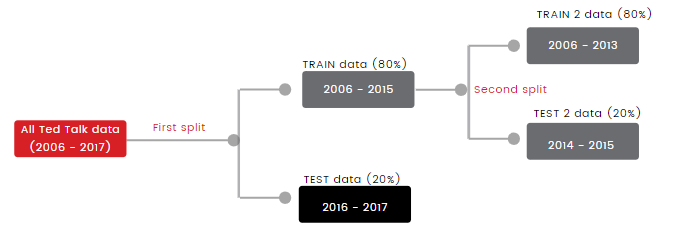

### First split:

We perform the first split now, and do not touch the test data until the end. We perform our second split of the training dataset right before modeling.

In [167]:
#Train data that will further be split into train and test for model building and evaluation
train = df_copy[(df_copy["year"] >= 2006) & (df_copy["year"] <= 2015)]

# Test data ("new data") -- will be set aside and only be used for final model evaluation
test = df_copy[(df_copy["year"]) >= 2016]  

---

# III - Exploratory Data Analysis (EDA)

Lets perform some basic data analysis on `train`.

## Preliminary visualization

In [168]:
train.columns

Index(['num_speaker', 'duration', 'languages', 'views', 'related_views',
       'related_duration', 'event_category', 'day', 'month', 'year',
       'day_film', 'month_film', 'year_film', 'title_len', 'description_len',
       'speaker_frequency', 'repeat_speaker', 'Technology/Science', 'Humanity',
       'Global Issues', 'Art/Creativity', 'Business', 'Entertainment',
       'Health', 'Communication', 'Education'],
      dtype='object')

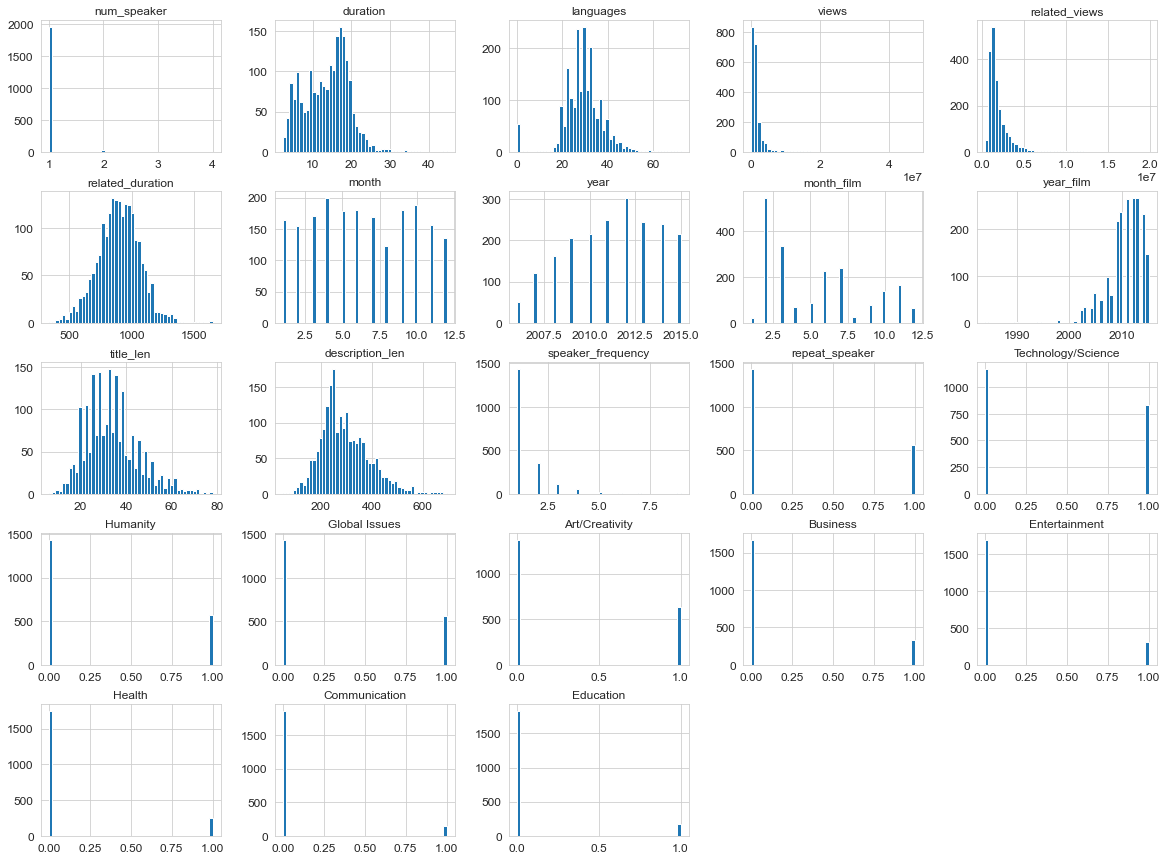

In [169]:
# Plot some histograms on the training dataset 

train.hist(bins=50, figsize=(20,15))
plt.show()

Saving figure correlation_matrix


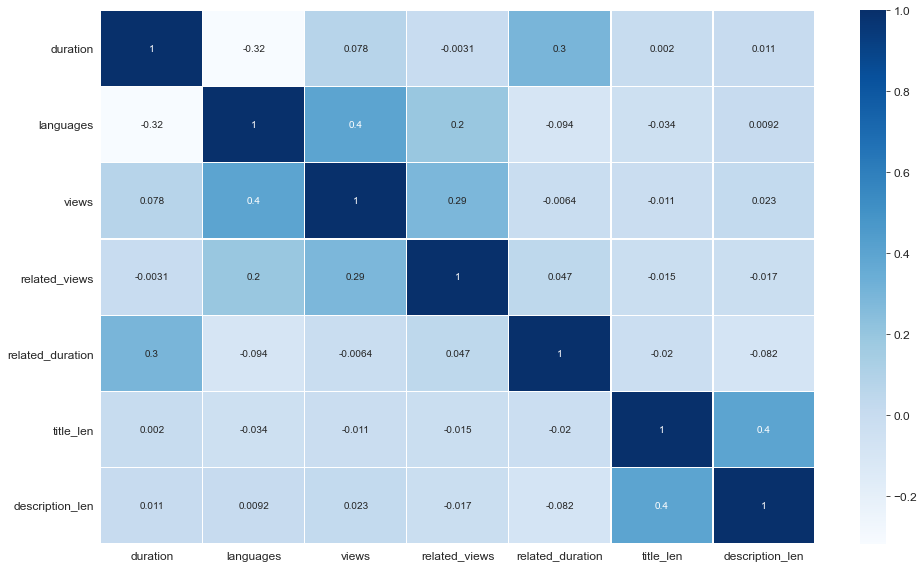

,duration,languages,views,related_views,related_duration,title_len,description_len
duration,1.000000,-0.316973,0.077581,-0.003139,0.296347,0.002012,0.010990
languages,-0.316973,1.000000,0.400823,0.195044,-0.094257,-0.034059,0.009188
views,0.077581,0.400823,1.000000,0.285808,-0.006356,-0.010829,0.022803
related_views,-0.003139,0.195044,0.285808,1.000000,0.046758,-0.015244,-0.016942
related_duration,0.296347,-0.094257,-0.006356,0.046758,1.000000,-0.020396,-0.081839
title_len,0.002012,-0.034059,-0.010829,-0.015244,-0.020396,1.000000,0.402069
description_len,0.010990,0.009188,0.022803,-0.016942,-0.081839,0.402069,1.000000


In [171]:
# Lets check for correlation

import seaborn as sns
from seaborn import pairplot
sns.set_style("whitegrid")

corr_continuous = train[['duration', 'languages','views','related_views','related_duration', 'title_len', 'description_len']]

plt.figure(figsize=(14,8))
sns.heatmap(corr_continuous.corr(), annot = True, cmap="Blues", linewidths=.1)
save_fig("correlation_matrix")
plt.show()

display(corr_continuous.corr())

* From the correlation table and pair plot, we can see that related_views and languages have a corr factor of 0.18, suggesting low to medium correlation.
* While duration have very weak correlation to views, number of speakers and different languages, suggesting longer talks don't seem to gather more attention from the audience.

## TED's categories: differents durations and views

Lets see how duration and views fluctuate through categories.

### Duration per category

Average duration = 13.6
Median duration = 14.38


,event_category,duration
201,TED1900s,44.63
224,TED2000s,37.03
179,TED2000s,35.47
1599,TED2000s,35.03
40,TED2000s,34.42
329,TEDGlobal,33.63
1602,TED2000s,33.50
89,TED2000s,32.15
269,TED2000s,31.13
150,TED2000s,29.85


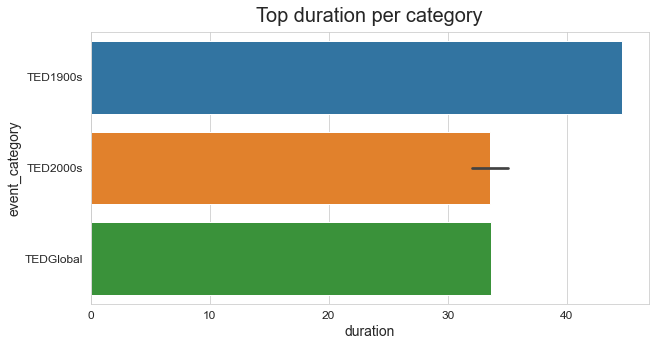

In [172]:
print("Average duration = {}".format(round(train["duration"].mean(), 2)))
print("Median duration = {}".format(round(train["duration"].median(), 2)))

display(train[["event_category", "duration"]].sort_values("duration", ascending=False).head(10))

plt.figure(figsize=(10,5))
ax = sns.barplot(x="duration", y="event_category", data=train.sort_values('duration', ascending=False)[:10])
ax.set_title("Top duration per category", pad=10, fontdict={'fontsize': 20})
plt.show()


* Knowing that on an average most TED talks are usually about 18 mins long, __average of 13.6 mins__ and __median of 14.1 mins__ for the entore dataset seems a little lower.

* TEDOther seems to be the most popular type of event. Infact most of the top duration talks aren't TED talks as seen from the _event_ column. These talks were just hosted on ted.com website.

* Having talks that over an hour are uncommon.

### Views per category

Average views = 1989730.25
Median views = 1470634.0


,event_category,related_views
1097,TEDOther,19871074
1814,TEDx,16127339
429,TED2000s,13065269
1849,TEDGlobal,12032103
321,TED2000s,11944922
301,TED2000s,11903226
47,TED2000s,11888126
864,TED2000s,11843988
1783,TEDx,11678706
1734,TED@,11453815


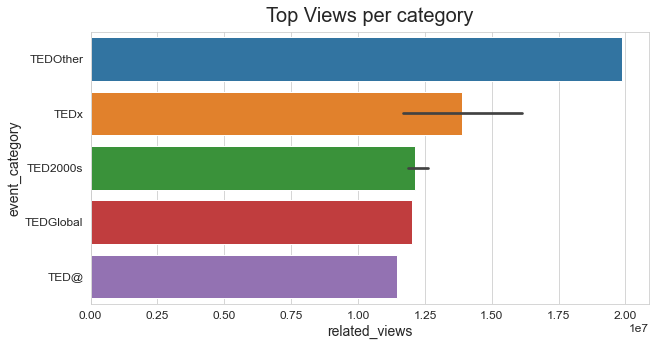

In [173]:
print("Average views = {}".format(round(train["related_views"].mean(), 2)))

print("Median views = {}".format(round(train["related_views"].median(), 2)))

display(train[["event_category", "related_views"]].sort_values('related_views', ascending=False).head(10))

plt.figure(figsize=(10,5))
ax = sns.barplot(x="related_views", y="event_category", data=train.sort_values('related_views', ascending=False)[:10])
ax.set_title("Top Views per category", pad=10, fontdict={'fontsize': 20})
plt.show()

* The most views came from TEDOther events, with almost 20 million views, which is huge when compared to average views of about 1.7 million, and a median of about 1.12 million.
* At second place is TEDx with more than 12.5 million views.

## Talks over years and months

How are the talks distributed throughout time since its creation?

### Years

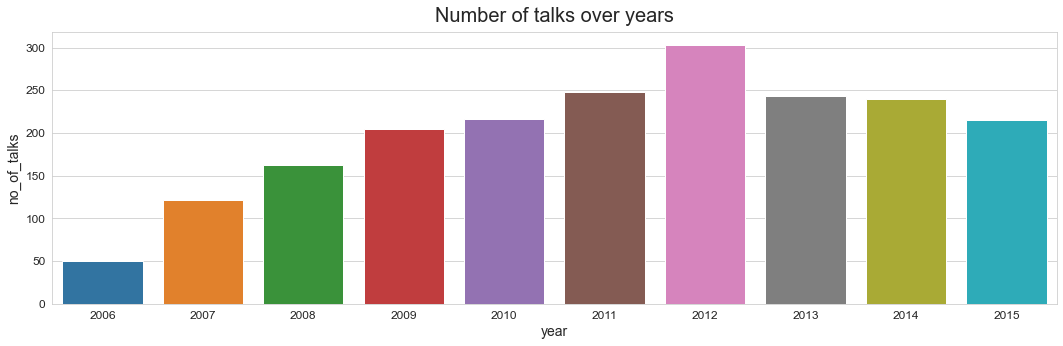

In [174]:
talk_years = train['year'].value_counts().reset_index()
talk_years.columns = ["year", "no_of_talks"]

plt.figure(figsize=(18,5))
ax = sns.barplot(x="year", y="no_of_talks", data=talk_years)
ax.set_title("Number of talks over years", pad=10, fontdict={'fontsize': 20})
plt.show()

* Number of talks increased consistently from 2006 to 2012 and then stabilized. 

### Months

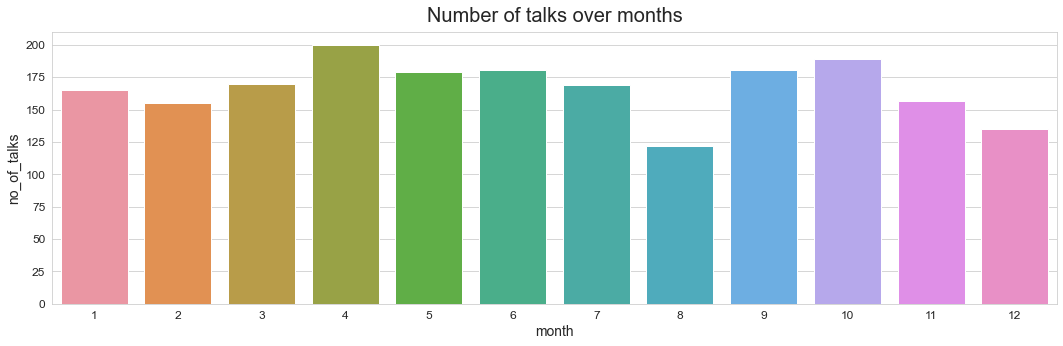

In [175]:
talk_years = train['month'].value_counts().reset_index()
talk_years.columns = ["month", "no_of_talks"]

plt.figure(figsize=(18,5))
ax = sns.barplot(x="month", y="no_of_talks", data=talk_years)
ax.set_title("Number of talks over months", pad=10, fontdict={'fontsize': 20})
plt.show()

#1 = january ; 12 = December

### Outlier Detection

We identified 51 outlier in this instance.

In [176]:
#use isolation forest to examine most extreme 2.5% of outliers from continuous variables from the analysis, which were visually identified during data exploration
continuous_vars = train[['duration', 'languages','views','related_views','related_duration']]

from sklearn.ensemble import IsolationForest
iforest = IsolationForest(n_estimators = 100,random_state=13, contamination=0.025) 

#predict anomalies
pred = iforest.fit_predict(continuous_vars)
#anomaly score of each 
iforest_scores = iforest.decision_function(continuous_vars)

#create a new variable to store the index number where anomaly =-1 in the anomalies vector
from numpy import where
anomaly_index = where(pred ==-1)
#extract values corresponding to the index of anomalies from the main df
anomaly_values = train.iloc[anomaly_index]
anomaly_values.head(3)

,num_speaker,duration,languages,views,related_views,related_duration,event_category,day,month,year,day_film,month_film,year_film,title_len,description_len,speaker_frequency,repeat_speaker,Technology/Science,Humanity,Global Issues,Art/Creativity,Business,Entertainment,Health,Communication,Education
0,1,19.40,60,47227110,3027062,921,TED2000s,Monday,6,2006,Friday,2,2006,27,149,3,1,0,1,0,1,0,0,0,0,1
5,1,21.75,36,20685401,8376548,851,TED2000s,Tuesday,6,2006,Wednesday,2,2006,20,122,1,0,0,1,0,0,1,1,0,0,0
47,1,3.50,66,10841210,11888126,894,TED2000s,Wednesday,12,2006,Tuesday,2,2005,20,209,2,1,0,1,0,0,1,1,0,0,0


---

## Further Ted Talks exploration: Cluster Visualization

To better understand the dataset, we tried to identify some groups of TED talks that share similar characteristics.

In [177]:
#make a copy of this dataset for clustering at the end
train_clust = train.copy()

train_cluster = train_clust[['duration','views', 'languages']]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_clust_std = scaler.fit_transform(train_cluster)

In [178]:
#Importing required modules
 
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np

#Transform the data
pca = PCA(2)
pca_cluster = pca.fit_transform(train_clust_std)

clusters:  2 , inertia:  4224.274690507132
clusters:  3 , inertia:  3035.0520047217165
clusters:  4 , inertia:  2466.133188735516
clusters:  5 , inertia:  2069.8667140761177
clusters:  6 , inertia:  1737.0028217951935
clusters:  7 , inertia:  1443.0648352191258
clusters:  8 , inertia:  1269.256309742919
clusters:  9 , inertia:  1138.6997823878476
clusters:  10 , inertia:  1014.8157945376228


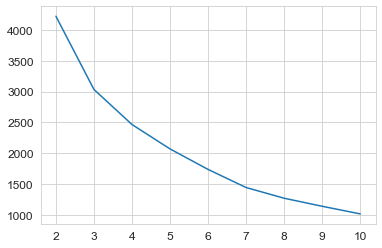

In [179]:
#Elbow Method
from sklearn.cluster import KMeans
withinss = []
for i in range(2,11):
    kmeans = KMeans(n_clusters=i)
    model_clustering = kmeans.fit(train_clust_std)
    withinss.append(model_clustering.inertia_) 
    print('clusters: ', i, ', inertia: ', model_clustering.inertia_)
    
from matplotlib import pyplot
pyplot.plot([2,3,4,5,6,7,8,9,10],withinss)    
#the optimal number of clusters is 4 

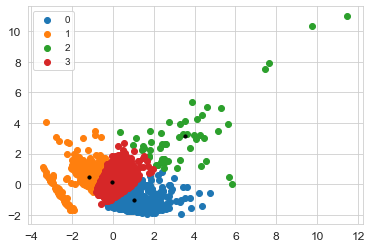

In [180]:
from sklearn.cluster import KMeans    
kmeans = KMeans(n_clusters=4, random_state = 42)    
model_clustering = kmeans.fit(pca_cluster)
labels = model_clustering.predict(pca_cluster)    

from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score
silhouette_score(pca_cluster,labels)
silhouette=silhouette_samples(pca_cluster,labels)
np.average(silhouette)

import matplotlib.pyplot as plt

#Getting the Centroids
centroids = kmeans.cluster_centers_
#Getting unique labels
u_labels = np.unique(labels)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(pca_cluster[labels == i , 0] , pca_cluster[labels == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 10,color="black")
plt.legend()
plt.show()

In [181]:
#number of observations in each cluster 
from collections import Counter
Counter(labels)

Counter({2: 53, 3: 846, 1: 592, 0: 512})

In [182]:
#group numbers into percentiles for easy visualization
cols = ['duration', 'views', 'languages']
new_cols = ['duration_p','views_p', 'languages_p']
for i in new_cols:
    train_cluster[i] = 0
for k in range(len(cols)):
    percentile = np.percentile(train_cluster[cols[k]], [25,50,75])
    for i in range(len(train_cluster)):
        if train_cluster[cols[k]][i] <= percentile[0]:
            train_cluster[new_cols[k]][i] = '0-25'
        elif train_cluster[cols[k]][i] <= percentile[1]:
            train_cluster[new_cols[k]][i] = '26-50'
        elif train_cluster[cols[k]][i] <= percentile[2]:
            train_cluster[new_cols[k]][i] = '51-75'
        else:
            train_cluster[new_cols[k]][i] = '76-100'

In [229]:
#rename cluster labels
train_cluster.loc[:,'cluster_labels'] = labels
train_cluster.loc[:, 'event_category'] = train_clust['event_category']


train_cluster.loc[train_cluster['cluster_labels'] ==0, 'cluster_labels'] = 'Cluster 1'
train_cluster.loc[train_cluster['cluster_labels'] ==1, 'cluster_labels'] = 'Cluster 2'
train_cluster.loc[train_cluster['cluster_labels'] ==2, 'cluster_labels'] = 'Cluster 3'
train_cluster.loc[train_cluster['cluster_labels'] ==3, 'cluster_labels'] = 'Cluster 4'
train_cluster.loc[train_cluster['cluster_labels'] ==4, 'cluster_labels'] = 'Cluster 5'

In [223]:
train_cluster.head(3)

,duration,views,languages,duration_p,views_p,languages_p,cluster_labels,event_category,repeat_speaker
0,19.40,47227110,60,76-100,76-100,76-100,Cluster 3,TED2000s,1
1,16.28,3200520,43,51-75,76-100,76-100,Cluster 4,TED2000s,1
2,21.43,1636292,26,76-100,51-75,26-50,Cluster 2,TED2000s,1


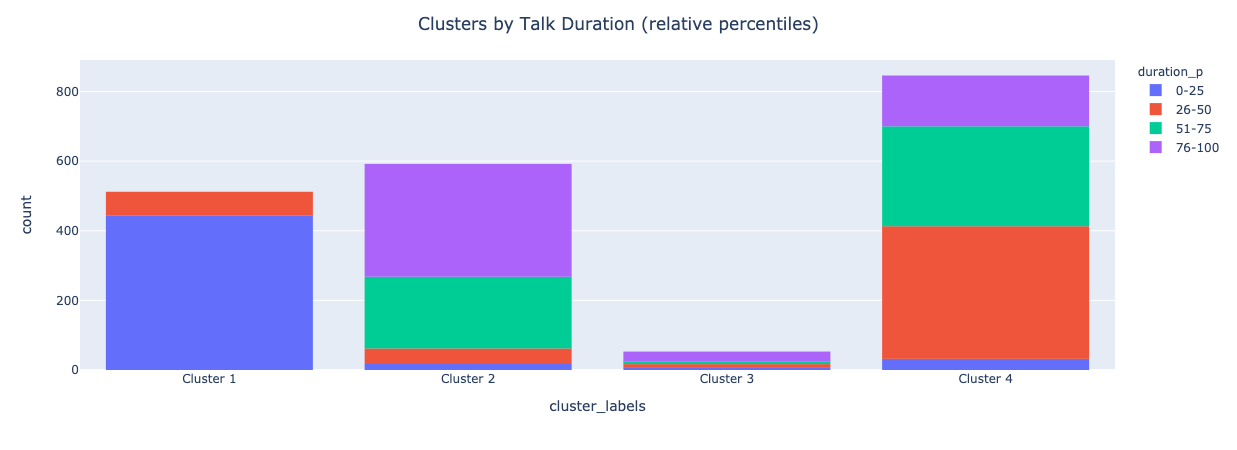

In [224]:
import plotly.express as px

#CLUSTER DISTRIBUTION FOR DURATION
fig = px.histogram(train_cluster, x = 'cluster_labels', color= 'duration_p',
                   labels=dict(goal_usd1 = 'Percentile'), 
                   category_orders={'duration_p': ['0-25', '26-50', '51-75', '75-100']}).update_xaxes(categoryorder='category ascending')

fig.update_layout(title_text='Clusters by Talk Duration (relative percentiles)', title_x=0.5)
fig.show()

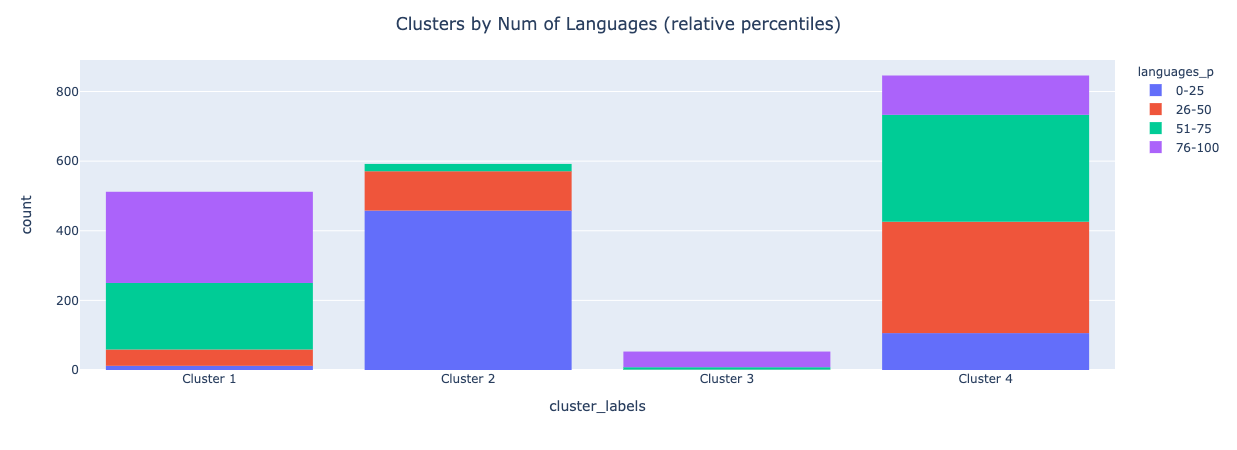

In [225]:
import plotly.express as px

#CLUSTER DISTRIBUTION FOR LANGUAGES 
fig = px.histogram(train_cluster, x = 'cluster_labels', color= 'languages_p',
                   labels=dict(goal_usd1 = 'Percentile'), 
                   category_orders={'languages_p': ['0-25', '26-50', '51-75', '75-100']}).update_xaxes(categoryorder='category ascending')

fig.update_layout(title_text='Clusters by Num of Languages (relative percentiles)', title_x=0.5)
fig.show()

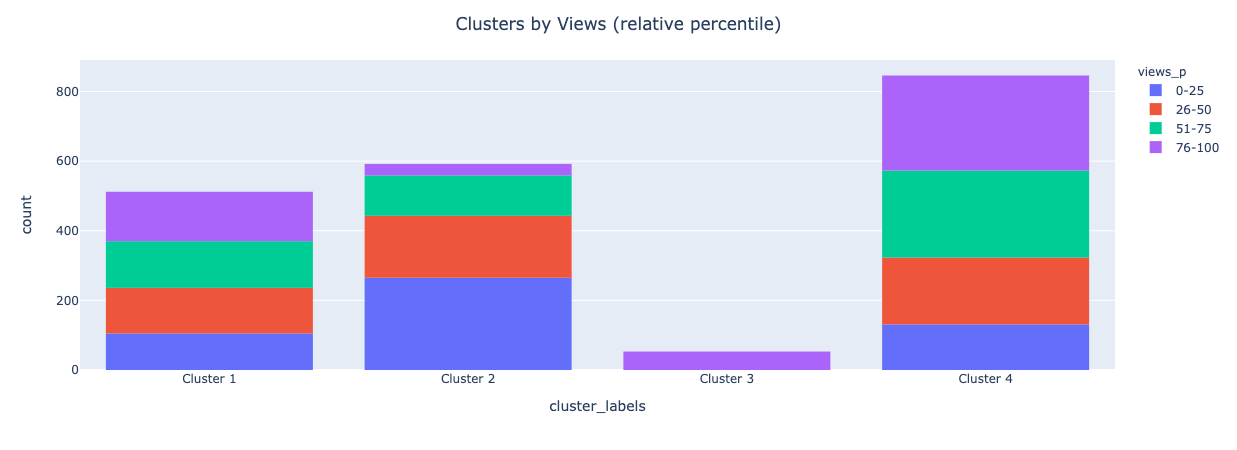

In [226]:
import plotly.express as px

#CLUSTER DISTRIBUTION FOR VIEWS
fig = px.histogram(train_cluster, x = 'cluster_labels', color= 'views_p',
                   labels=dict(goal_usd1 = 'Percentile'), 
                   category_orders={'views_p': ['0-25', '26-50', '51-75', '75-100']}).update_xaxes(categoryorder='category ascending')

fig.update_layout(title_text='Clusters by Views (relative percentile)', title_x=0.5)
fig.show()

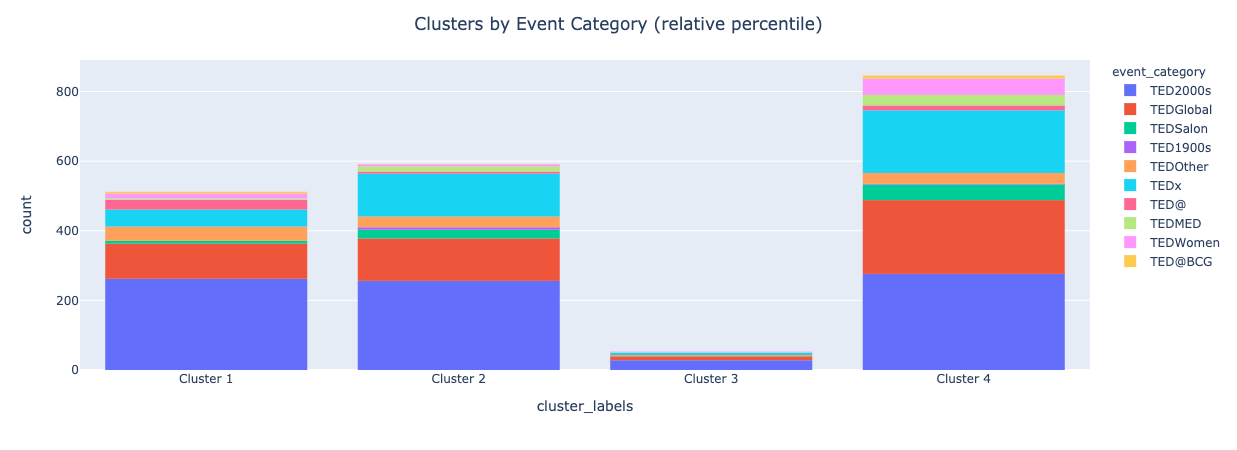

In [227]:
import plotly.express as px

#CLUSTER DISTRIBUTION FOR VIEWS
fig = px.histogram(train_cluster, x = 'cluster_labels', color= 'event_category',
                   labels=dict(goal_usd1 = 'Percentile'), 
                   category_orders={'views_p': ['0-25', '26-50', '51-75', '75-100']}).update_xaxes(categoryorder='category ascending')

fig.update_layout(title_text='Clusters by Event Category (relative percentile)', title_x=0.5)
fig.show()

---

# IV - Prepare data for modeling

### Drop useless and invalid predictors 

We first drop columns related to recommended videos as we assume that this will not be generated until the video has been posted online. We also assume that we cannot use languages as TED uses a volunteer based translation service where viewers can translate their favourite talks: https://www.ted.com/about/programs-initiatives/ted-translators. We assume this would not occur until after the video is posted also.

In [189]:
train.drop(['related_views','related_duration', 'languages'], axis = 1, inplace = True)

In [190]:
train

,num_speaker,duration,views,event_category,day,month,year,day_film,month_film,year_film,title_len,description_len,speaker_frequency,repeat_speaker,Technology/Science,Humanity,Global Issues,Art/Creativity,Business,Entertainment,Health,Communication,Education
0,1,19.40,47227110,TED2000s,Monday,6,2006,Friday,2,2006,27,149,3,1,0,1,0,1,0,0,0,0,1
1,1,16.28,3200520,TED2000s,Monday,6,2006,Friday,2,2006,27,233,4,1,1,1,1,0,0,0,0,0,0
2,1,21.43,1636292,TED2000s,Monday,6,2006,Thurday,2,2006,16,202,3,1,1,0,0,0,0,1,0,0,0
3,1,18.60,1697550,TED2000s,Monday,6,2006,Saturday,2,2006,19,213,2,1,0,0,1,0,1,0,0,0,0
4,1,19.83,12005869,TED2000s,Tuesday,6,2006,Tuesday,2,2006,31,172,9,1,0,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1998,1,8.82,1453242,TEDx,Wednesday,12,2015,Wednesday,11,2014,54,457,2,1,0,1,0,0,0,0,0,0,0
1999,2,15.73,2269844,TEDWomen,Thurday,12,2015,Tuesday,5,2015,53,419,1,0,0,1,1,1,0,0,0,0,0
2000,1,19.90,1117165,TEDGlobal,Friday,12,2015,Monday,12,2015,39,542,1,0,0,0,0,0,0,1,0,0,0
2001,1,9.47,1254964,TEDGlobal,Monday,12,2015,Monday,6,2015,59,547,1,0,0,0,0,0,0,0,0,0,0


### Categorical Encoding 

In [191]:
train = pd.get_dummies(data = train, columns = ["event_category","day","month","day_film","month_film"])

In [192]:
# training data for the different models that will be tested
train2 = train[(train["year"] >= 2006) & (train["year"] <= 2013)]

# test data that will be use to evaluate all tested models
test2 = train[(train["year"]) >= 2014]

### Second split : Data for model building and cross validation

In [193]:
y_train2 = train2['views']
X_train2 = train2.drop('views', axis = 1)

y_test2 = test2['views']
X_test2 = test2.drop('views', axis = 1)

### Feature selection 


We now perform recursive feature elimination using random forest, and select top 35 features.

In [197]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=42)
model = RFE(rf, n_features_to_select=50)
fit_model = model.fit(X_train2, y_train2)
features = pd.DataFrame(list(zip(X_train2.columns,fit_model.ranking_)), columns = ['predictor','ranking'])

In [198]:
chosen_features = features.sort_values(by = 'ranking').head(35)['predictor'].tolist()
chosen_features

['num_speaker',
 'day_film_Tuesday',
 'day_film_Wednesday',
 'month_film_2',
 'month_film_5',
 'month_film_6',
 'month_film_9',
 'day_film_Thurday',
 'month_film_10',
 'day_Sunday',
 'day_Tuesday',
 'Business',
 'description_len',
 'title_len',
 'speaker_frequency',
 'day_Thurday',
 'repeat_speaker',
 'day_film_Sunday',
 'day_film_Monday',
 'day_Wednesday',
 'month_1',
 'month_2',
 'month_3',
 'month_4',
 'month_5',
 'day_film_Saturday',
 'month_6',
 'month_8',
 'month_9',
 'month_10',
 'month_11',
 'month_12',
 'day_film_Friday',
 'month_7',
 'Technology/Science']

In [199]:
X_train2 = X_train2[chosen_features]
X_test2 = X_test2[chosen_features]

In [200]:
X_train2.shape

(1548, 35)

In [201]:
X_test2.shape

(455, 35)

In [202]:
X_train2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 35 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   num_speaker         1548 non-null   int64
 1   day_film_Tuesday    1548 non-null   uint8
 2   day_film_Wednesday  1548 non-null   uint8
 3   month_film_2        1548 non-null   uint8
 4   month_film_5        1548 non-null   uint8
 5   month_film_6        1548 non-null   uint8
 6   month_film_9        1548 non-null   uint8
 7   day_film_Thurday    1548 non-null   uint8
 8   month_film_10       1548 non-null   uint8
 9   day_Sunday          1548 non-null   uint8
 10  day_Tuesday         1548 non-null   uint8
 11  Business            1548 non-null   int64
 12  description_len     1548 non-null   int64
 13  title_len           1548 non-null   int64
 14  speaker_frequency   1548 non-null   int64
 15  day_Thurday         1548 non-null   uint8
 16  repeat_speaker      1548 non-null   int64


### Scale Features

In [203]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train2)
X_train2 = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.fit_transform(X_test2)
X_test2 = pd.DataFrame(X_test_scaled)

In [204]:
#This pipeline doesn't work well with the above steps, not sure how to do feature selection with it

'''
train_num = X_train2.drop(["event_category","day","month","day_film","month_film"], axis=1)
train_cat = X_train2[["event_category","day","month","day_film","month_film"]]

test_num = X_test2.drop(["event_category","day","month","day_film","month_film"], axis=1)
test_cat = X_test2[["event_category","day","month","day_film","month_film"]]


from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
cat_1hot_train = cat_encoder.fit_transform(train_cat)
cat_1hot_test = cat_encoder.fit_transform(test_cat)

cat_1hot_train.toarray()
cat_1hot_test.toarray()

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
    ])
train_num_tr = num_pipeline.fit_transform(train_num)
test_num_tr = num_pipeline.fit_transform(test_num)

train_num_tr
test_num_tr


from sklearn.compose import ColumnTransformer

num_attribs_train = list(X_train2.drop(["event_category","day","month","day_film","month_film"], axis=1))
num_attribs_test = list(X_test2.drop(["event_category","day","month","day_film","month_film"], axis=1))

cat_attribs = ["event_category","day","month","day_film","month_film"]

full_pipeline = ColumnTransformer([
        ("cat", OneHotEncoder(), cat_attribs),
        ("num", num_pipeline, num_attribs_train),
    ])

full_pipeline = ColumnTransformer([
        ("cat", OneHotEncoder(), cat_attribs),
        ("num", num_pipeline, num_attribs_test),
    ])

train_prepared = full_pipeline.fit_transform(X_train2)
test_prepared = full_pipeline.fit_transform(X_test2)

'''

'\ntrain_num = X_train2.drop(["event_category","day","month","day_film","month_film"], axis=1)\ntrain_cat = X_train2[["event_category","day","month","day_film","month_film"]]\n\ntest_num = X_test2.drop(["event_category","day","month","day_film","month_film"], axis=1)\ntest_cat = X_test2[["event_category","day","month","day_film","month_film"]]\n\n\nfrom sklearn.preprocessing import OneHotEncoder\ncat_encoder = OneHotEncoder()\ncat_1hot_train = cat_encoder.fit_transform(train_cat)\ncat_1hot_test = cat_encoder.fit_transform(test_cat)\n\ncat_1hot_train.toarray()\ncat_1hot_test.toarray()\n\nfrom sklearn.pipeline import Pipeline\nfrom sklearn.preprocessing import StandardScaler\n\nnum_pipeline = Pipeline([\n        (\'std_scaler\', StandardScaler()),\n    ])\ntrain_num_tr = num_pipeline.fit_transform(train_num)\ntest_num_tr = num_pipeline.fit_transform(test_num)\n\ntrain_num_tr\ntest_num_tr\n\n\nfrom sklearn.compose import ColumnTransformer\n\nnum_attribs_train = list(X_train2.drop(["event_

---

# V - Select and train a model 

In [207]:
#Import models' packages
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error

# AG: I droped linear regression. the results are far from insightful; the comparison loses its meaning.

'''
#Regression Models
regression_models = [['Linear Regression',LinearRegression()], 
                     ['RF regressor',RandomForestRegressor()], 
                     ['GBT',GradientBoostingRegressor()],
                     ['LASSO', Lasso()],
                     ['Ridge', Ridge()]]
                     

MSEs = []
MAEs = []
Models = ['Linear Regression', 'Random Forest Regressor', 'Gradient Boosting Regressor', 'Lasso', 'Ridge']

for name, model in regression_models: 
    print('Model = ', name)
    model.fit(X_train2, y_train2.values.ravel())
    y_test_pred = model.predict(X_test2)
    
    MSE = mean_squared_error(y_test2, y_test_pred)
    MAE = mean_absolute_error(y_test2, y_test_pred)
    MSEs.append(MSE)
    MAEs.append(MAE)
    print("MSE: ", MSE)
    print("MAE: ", MAE)
    print("-" * 19)
'''

#Regression Models
regression_models = [['RF regressor',RandomForestRegressor()], 
                     ['GBT',GradientBoostingRegressor()],
                     ['LASSO', Lasso()],
                     ['Ridge', Ridge()]]
                     

MSEs = []
MAEs = []
Models = ['Random Forest Regressor', 'Gradient Boosting Regressor', 'Lasso', 'Ridge']

for name, model in regression_models: 
    print('Model = ', name)
    model.fit(X_train2, y_train2.values.ravel())
    y_test_pred = model.predict(X_test2)
    
    MSE = mean_squared_error(y_test2, y_test_pred)
    MAE = mean_absolute_error(y_test2, y_test_pred)
    MSEs.append(MSE)
    MAEs.append(MAE)
    print("MSE: ", MSE)
    print("MAE: ", MAE)
    print("-" * 19)

Model =  RF regressor
MSE:  3650814139297.7144
MAE:  1027971.2752087911
-------------------
Model =  GBT
MSE:  3893291035429.48
MAE:  992309.9967209233
-------------------
Model =  LASSO
MSE:  3112999649617.841
MAE:  927320.0180903763
-------------------
Model =  Ridge
MSE:  3113161187612.144
MAE:  927342.1684481016
-------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 284353828203368.0, tolerance: 1337178816345.5298



In [208]:
y_test2.mean()

1888806.4175824176

#### Simple visualization of the initial results - MSE

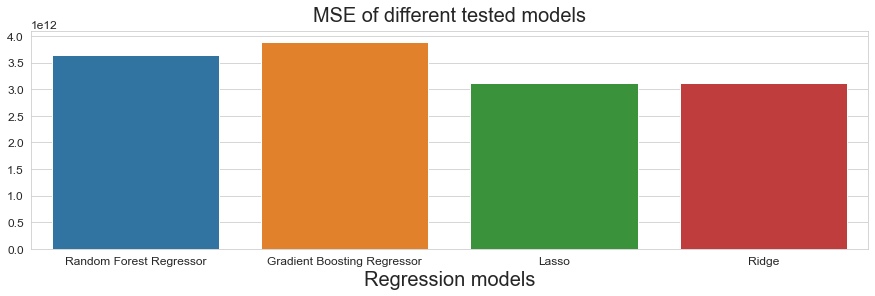

In [209]:
d = {'Model' : Models, 'MSE': MSEs}
MSE_vis = pd.DataFrame(d)

fig_dims = (15, 4)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.barplot(x="Model", y="MSE", data=d, ax = ax)
ax.set_title("MSE of different tested models", pad=10, fontdict={'fontsize': 20})
ax.set_xlabel("Regression models",fontsize=20)
plt.show()

#### Simple visualization of the initial results - MAE

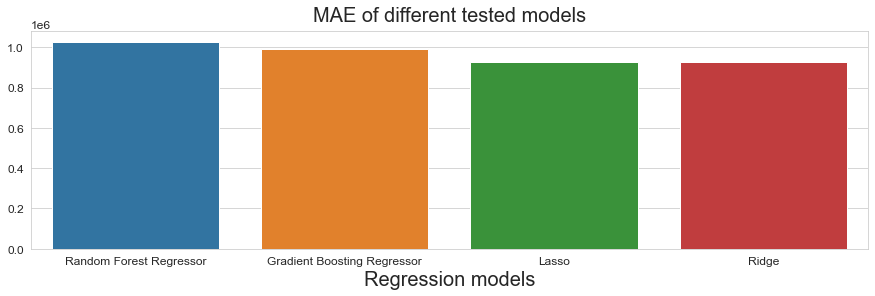

In [210]:
df_MAE = {'Model' : Models, 'MAE': MAEs}

fig_dims = (15, 4)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.barplot(x="Model", y="MAE", data=df_MAE, ax = ax)
ax.set_title("MAE of different tested models", pad=10, fontdict={'fontsize': 20})
ax.set_xlabel("Regression models",fontsize=20)
plt.show()

---

## Testing more advanced linear regression models 
1. XGBoost
2. Light GMB
3. SVM
4. Adabost
5. KNN

### I - XGBoost 

In [211]:
import xgboost as xg 
xgb_regressor = xg.XGBRegressor(objective ='reg:linear', n_estimators = 10, seed = 123) 
  
# Fitting the model 
xgb_regressor.fit(X_train2, y_train2.values.ravel()) 
  
# Predict the model 
y_test_pred = xgb_regressor.predict(X_test2) 
  
# MSE Computation
xgb_MSE = mean_squared_error(y_test2, y_test_pred)
print('The MSE of the XGBoost model is: ', xgb_MSE)

# MAE Computation
xgb_MAE = mean_absolute_error(y_test2, y_test_pred)
print('The MAE of the XGBoost model is: ', xgb_MAE)

# RMSE Computation
from sklearn.metrics import mean_squared_log_error
print('The RMSE of prediction for XGBoost is:', round(mean_squared_log_error(y_test2, y_test_pred) ** 0.5, 5))

[11:14:17] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[11:14:17] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
The MSE of the XGBoost model is:  4268479383685.009
The MAE of the XGBoost model is:  968595.3905906593
The RMSE of prediction for XGBoost is: 0.62641


In [212]:
# Parameter testing for base learner
# Train and test set are converted to DMatrix objects, as it is required by learning API. 
train_dmatrix = xg.DMatrix(data = X_train2, label = y_train2) 
test_dmatrix = xg.DMatrix(data = X_test2, label = y_test2) 
  
# Parameter dictionary specifying base learner 
param = {"booster":"gblinear", "objective":"reg:linear"} 
  
xgb_r = xg.train(params = param, dtrain = train_dmatrix, num_boost_round = 10) 
pred = xgb_r.predict(test_dmatrix) 

# MSE Computation
xgb_MSE2 = mean_squared_error(y_test2, pred)
print('The MSE of the XGBoost model is: ', xgb_MSE2)

# MAE Computation
xgb_MAE2 = mean_absolute_error(y_test2, pred)
print('The MAE of the XGBoost model is: ', xgb_MAE2)

# RMSE Computation
print('The RMSE of prediction is:', round(mean_squared_log_error(y_test2, pred) ** 0.5, 5))

[11:14:18] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[11:14:18] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
The MSE of the XGBoost model is:  3108395865665.7866
The MAE of the XGBoost model is:  925169.246771978
The RMSE of prediction is: 0.58119


We can see an improvement in the MSE with the use of the parameter dictionnary 

### II - LightGBM 

In [213]:
import lightgbm as lgb

hyper_params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': ['l2', 'auc'],
    'learning_rate': 0.005,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.7,
    'bagging_freq': 10,
    'verbose': 0,
    "max_depth": 8,
    "num_leaves": 128,  
    "max_bin": 512,
    "num_iterations": 100000,
    "n_estimators": 1000
}

gbm = lgb.LGBMRegressor(**hyper_params)

gbm.fit(X_train2, y_train2,
        eval_set=[(X_test2, y_test2)],
        eval_metric='l1',
        early_stopping_rounds=1000)


/opt/anaconda3/lib/python3.7/site-packages/lightgbm/engine.py:151: UserWarning:

Found `num_iterations` in params. Will use it instead of argument



[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002644 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be

LGBMRegressor(bagging_fraction=0.7, bagging_freq=10, feature_fraction=0.9,
              learning_rate=0.005, max_bin=512, max_depth=8,
              metric=['l2', 'auc'], n_estimators=1000, num_iterations=100000,
              num_leaves=128, objective='regression', task='train', verbose=0)

In [214]:
y_pred = gbm.predict(X_test2, num_iteration=gbm.best_iteration_)

# MSE Computation
lightgbm_MSE = mean_squared_error(y_test2, y_pred)
print('The MSE of LightGBM is: ', lightgbm_MSE)

# MAE Computation
lightgbm_MAE = mean_absolute_error(y_test2, y_pred)
print('The MAE of the LightGBM model is: ', lightgbm_MAE)

# RMSE Computation
print('The RMSE of prediction for LightGBM is:', round(mean_squared_log_error(y_test2, y_pred) ** 0.5, 5))

The MSE of LightGBM is:  3019378074083.126
The MAE of the LightGBM model is:  868198.5452266944
The RMSE of prediction for LightGBM is: 0.54046


### III - SVM

In [215]:
from sklearn.svm import SVR

SVR_regressor = SVR(kernel = 'rbf')
SVR_regressor.fit(X_train2, y_train2)

#predict new results
y_pred_SVR = SVR_regressor.predict(X_test2)


# MSE Computation
SVM_MSE = mean_squared_error(y_test2, y_pred_SVR)
print('The MSE of SVM is: ', SVM_MSE)

# MAE Computation
SVM_MAE = mean_absolute_error(y_test2, y_pred_SVR)
print('The MAE of the SVM model is: ', SVM_MAE)

# RMSE Computation
print('The RMSE of prediction for SVM is:', round(mean_squared_log_error(y_test2, y_pred_SVR) ** 0.5, 5))

The MSE of SVM is:  3750364694674.4434
The MAE of the SVM model is:  919970.4870137835
The RMSE of prediction for SVM is: 0.68186


### IV - ADABOOST

In [216]:
from sklearn.ensemble import AdaBoostRegressor

ADAB_regressor = AdaBoostRegressor()

ADAB_regressor.fit(X_train2, y_train2)

#predict new results
y_pred_ADAB = ADAB_regressor.predict(X_test2)

# MSE Computation
ADAB_MSE = mean_squared_error(y_test2, y_pred_ADAB)
print('The MSE of ADABOOST is: ', ADAB_MSE)

# MAE Computation
ADAB_MAE = mean_absolute_error(y_test2, y_pred_ADAB)
print('The MAE of the ADABOOST model is: ', ADAB_MAE)

# RMSE Computation
print('The RMSE of prediction for ADABOOST is:', round(mean_squared_log_error(y_test2, y_pred_ADAB) ** 0.5, 5))

The MSE of ADABOOST is:  33671265355864.176
The MAE of the ADABOOST model is:  5400176.903795613
The RMSE of prediction for ADABOOST is: 1.59065


### V - KNN Regressor

In [217]:
from sklearn import neighbors

MSE_val = [] #to store MSE values for different k

for K in range(0,20):
    K = K+1
    model_KNN = neighbors.KNeighborsRegressor(n_neighbors = K)

    model_KNN.fit(X_train2, y_train2)  #fit the model
    pred_KNN = model_KNN.predict(X_test2) #make prediction on test set
    MSE = mean_squared_error(y_test2, pred_KNN) #calculate MSE
    MSE_val.append(MSE) #store MSE
    print('MSE value for k= ' , K , 'is:', MSE)

MSE value for k=  1 is: 10939924612292.004
MSE value for k=  2 is: 6593900209804.31
MSE value for k=  3 is: 5080492231494.802
MSE value for k=  4 is: 4603776115033.674
MSE value for k=  5 is: 4115525632070.505
MSE value for k=  6 is: 3981016870902.706
MSE value for k=  7 is: 3872132837061.2153
MSE value for k=  8 is: 3838364604979.797
MSE value for k=  9 is: 3775934672560.9663
MSE value for k=  10 is: 3548665480183.677
MSE value for k=  11 is: 3508804811376.1943
MSE value for k=  12 is: 3484020666380.808
MSE value for k=  13 is: 3472600400195.3975
MSE value for k=  14 is: 3462251491310.365
MSE value for k=  15 is: 3486702193466.9624
MSE value for k=  16 is: 3462483331785.7935
MSE value for k=  17 is: 3412485657057.9688
MSE value for k=  18 is: 3392590750643.7114
MSE value for k=  19 is: 3368949923274.724
MSE value for k=  20 is: 3313845357397.0776


<AxesSubplot:>

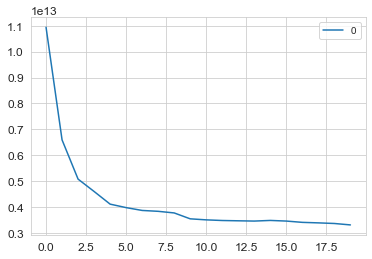

In [218]:
#Plotting MSE values
curve = pd.DataFrame(MSE_val) #elbow curve 
curve.plot()

We can see that the lowest value of MSE is at K = 20 

In [219]:
model_KNN = neighbors.KNeighborsRegressor(n_neighbors = 20)
model_KNN.fit(X_train2, y_train2)  #fit the model

#predict new results
y_pred_KNN = model_KNN.predict(X_test2)

# MSE Computation
KNN_MSE = mean_squared_error(y_test2, y_pred_KNN)
print('The MSE of KNN is: ', KNN_MSE)

# MAE Computation
KNN_MAE = mean_absolute_error(y_test2, y_pred_KNN)
print('The MAE of the KNN model is: ', KNN_MAE)

# RMSE Computation
print('The RMSE of prediction for KNN is:', round(mean_squared_log_error(y_test2, y_pred_KNN) ** 0.5, 5))

The MSE of KNN is:  3313845357397.0776
The MAE of the KNN model is:  960141.9254945056
The RMSE of prediction for KNN is: 0.61235


## Visualization of all models tested

In [220]:
second_MSEs = [xgb_MSE2, lightgbm_MSE, SVM_MSE, ADAB_MSE, KNN_MSE]
ALL_MSES = MSEs + second_MSEs
ALL_MSES

[3650814139297.7144,
 3893291035429.48,
 3112999649617.841,
 3113161187612.144,
 3108395865665.7866,
 3019378074083.126,
 3750364694674.4434,
 33671265355864.176,
 3313845357397.0776]

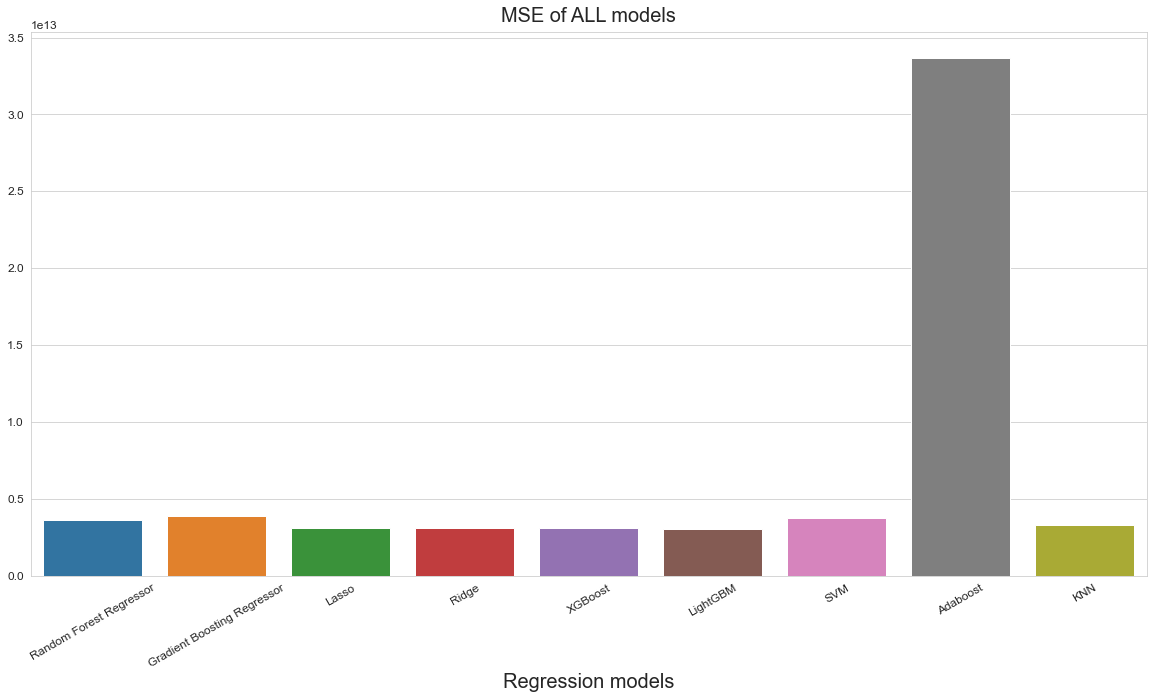

In [221]:
Models = ['Random Forest Regressor',
          'Gradient Boosting Regressor',
          'Lasso',
          'Ridge',
         'XGBoost',
         'LightGBM',
         'SVM',
         'Adaboost',
         'KNN']

d = {'Model' : Models, 'MSE': ALL_MSES}
MSE_vis = pd.DataFrame(d)

fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.barplot(x="Model", y="MSE", data=d, ax = ax)
ax.set_title("MSE of ALL models", pad=10, fontdict={'fontsize': 20})
ax.set_xlabel("Regression models",fontsize=20)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
plt.show()

| Model | MSE | MAE |
| --- | --- | --- |
| Random Forest Regressor | 4853395784621.763 | 1152744.551 |
| Gradient Boosting Regressor | 5766566648207.110 | 1022028.507 |
| LASSO | 3180278704942.826 | 922782.357 |
| Ridge | 3179927879399.363 | 922654.039 |
| XGBoost | 3168500886091.997 | 919170.458 |
| Light GBM | 3019062685001.349 | 868093.105 |
| SVM | 3750365643844.606 | 919970.510 |
| AdaBoost | 5083331962097.967 | 1477552.734 |
| KNN regressor | 3423718454717.121 | 1012441.180 |

#### Best Models
From the above results, we can see that the models with the lowest MSE are :
1. LightGBM
2. XGBoost

These are the models that will be fined tuned to find the final model that will be evaluated with our validation (initial test) dataset

---

## Fine Tuning Top 2 Performing Models

Here we'll take the top 2 models and evaluate their performance. 

**TBC:** <br>
Cross validation will be also performed on both models.

### LigthGBM: Fine tuning and Time-Based Cross validation

In [129]:
#parameters that we will tune
search_params = {'learning_rate': 0.1, #learning rate
                 'max_depth': 200, #max depth of each trained tree -- has impact on model performance and training time
                 'num_leaves': 250, #important parameter -- controls complexity of model --> num leaves = 2^ (max_depth)
                 'feature_fraction': 0.8, #column sampling - % of features selected
                 'subsample': 0.2}

#parameters that should not change
fixed_params = {'objective': 'regression',
              'metric': ['l2', 'auc'],
              'boosting':'gbdt',
              'num_boost_round':300,
              'early_stopping_rounds':30}

def train_evaluate(search_params):
    train = lgb.Dataset(X_train2, label=y_train2)
    valid_data = lgb.Dataset(X_test2, label=y_test2)

    params = {'metric':fixed_params['metric'],
             'objective':fixed_params['objective'],
             **search_params}

    gbm_TUNED = lgb.LGBMRegressor(**params)
    
    gbm_TUNED.fit(X_train2, y_train2,
        eval_set=[(X_test2, y_test2)],
        eval_metric='l1',
        early_stopping_rounds=10000)
    
    num_iteration_GBM = gbm_TUNED.best_iteration_
    #best_param = gbm_TUNED.best_params_
    score = gbm_TUNED.best_score_
    
    test = 'test rentre fonction'
    
    return score, num_iteration_GBM, test

train_evaluate(search_params)

#print("Best parameters found: ", gbm_TUNED.best_params_)


[1]	valid_0's l1: 865142	valid_0's l2: 3.02416e+12	valid_0's auc: 1
Training until validation scores don't improve for 10000 rounds
[2]	valid_0's l1: 865658	valid_0's l2: 3.02727e+12	valid_0's auc: 1
[3]	valid_0's l1: 866196	valid_0's l2: 3.03884e+12	valid_0's auc: 1
[4]	valid_0's l1: 864191	valid_0's l2: 3.03879e+12	valid_0's auc: 1
[5]	valid_0's l1: 861006	valid_0's l2: 3.04228e+12	valid_0's auc: 1
[6]	valid_0's l1: 864767	valid_0's l2: 3.0417e+12	valid_0's auc: 1
[7]	valid_0's l1: 860697	valid_0's l2: 3.05468e+12	valid_0's auc: 1
[8]	valid_0's l1: 868116	valid_0's l2: 3.05416e+12	valid_0's auc: 1
[9]	valid_0's l1: 865145	valid_0's l2: 3.05688e+12	valid_0's auc: 1
[10]	valid_0's l1: 865679	valid_0's l2: 3.05972e+12	valid_0's auc: 1
[11]	valid_0's l1: 865182	valid_0's l2: 3.06248e+12	valid_0's auc: 1
[12]	valid_0's l1: 868782	valid_0's l2: 3.07364e+12	valid_0's auc: 1
[13]	valid_0's l1: 871096	valid_0's l2: 3.07876e+12	valid_0's auc: 1
[14]	valid_0's l1: 875367	valid_0's l2: 3.09011e+

(defaultdict(collections.OrderedDict,
             {'valid_0': OrderedDict([('l1', 860696.891196028),
                           ('l2', 3054679258634.398),
                           ('auc', 1.0)])}),
 7,
 'test rentre fonction')

In [130]:
# Comparing with original MSE, MAE and RMSE

print('----- LightGBM: Comparing with original MSE, MAE and RMSE -----')
print('---------------------------------------------------------------')

# MSE Computation
lightgbm_MSE = mean_squared_error(y_test2, y_pred)
print('The MSE of tuned LightGBM is: ', lightgbm_MSE)
print('MSE decreased: ', (1-lightgbm_MSE/3019062685001.349)*100, ' %')
print('---------------------------------------------------------------')

# MAE Computation
lightgbm_MAE = mean_absolute_error(y_test2, y_pred)
print('The MAE of the tuned LightGBM model is: ', lightgbm_MAE)
print('MAE increased: ', (1-lightgbm_MAE/868093.105)*100, ' %')
print('---------------------------------------------------------------')

# RMSE Computation
print('The RMSE of prediction for tuned LightGBM is:', round(mean_squared_log_error(y_test2, y_pred) ** 0.5, 5))


----- LightGBM: Comparing with original MSE, MAE and RMSE -----
---------------------------------------------------------------
The MSE of tuned LightGBM is:  3018773039787.4604
MSE decreased:  0.009593878766667174  %
---------------------------------------------------------------
The MAE of the tuned LightGBM model is:  868084.5733189193
MAE increased:  0.000982807147242859  %
---------------------------------------------------------------
The RMSE of prediction for tuned LightGBM is: 0.54034


### XGBOOST : Fine tuning and Time-Based Cross validation

Reference:

https://goodboychan.github.io/chans_jupyter/python/datacamp/machine_learning/2020/07/07/02-Fine-tuning-your-XGBoost-model.html
<br>
<br>
<br>
<br>
NOT used:<br>
or: 
https://www.kaggle.com/general/17120


or: 
https://blog.cambridgespark.com/hyperparameter-tuning-in-xgboost-4ff9100a3b2f

faut juste faire attention car la maniere donc on fait le cross val c'est pas comme avec un train/test split regulier!

In [136]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb

# Create the parameter grid: gbm_param_grid
gbm_param_grid = {
    'n_estimators': [25],
    'max_depth': range(2, 12)
}

# Instantiate the regressor: gbm
gbm = xgb.XGBRegressor(n_estimators=10)

# Perform random search: randomized_mse
randomized_mse = RandomizedSearchCV(param_distributions=gbm_param_grid, estimator=gbm, 
                                    scoring='neg_mean_squared_error', n_iter=5, cv=4, 
                                   verbose=1)

# Fit randomized_mse to the data
randomized_mse.fit(X_train2, y_train2, eval_set=[(X_test2, y_test2)])

# Print the best parameters and lowest RMSE
print("Best parameters found: ", randomized_mse.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(randomized_mse.best_score_)))


Fitting 4 folds for each of 5 candidates, totalling 20 fits
[09:51:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:2.4545e+06
[1]	validation_0-rmse:2.37564e+06
[2]	validation_0-rmse:2.31768e+06
[3]	validation_0-rmse:2.27669e+06
[4]	validation_0-rmse:2.25813e+06
[5]	validation_0-rmse:2.24866e+06
[6]	validation_0-rmse:2.25074e+06
[7]	validation_0-rmse:2.26154e+06
[8]	validation_0-rmse:2.2803e+06
[9]	validation_0-rmse:2.30262e+06
[10]	validation_0-rmse:2.32978e+06
[11]	validation_0-rmse:2.36181e+06
[12]	validation_0-rmse:2.39747e+06
[13]	validation_0-rmse:2.43458e+06
[14]	validation_0-rmse:2.46761e+06
[15]	validation_0-rmse:2.50322e+06


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[16]	validation_0-rmse:2.53846e+06
[17]	validation_0-rmse:2.57309e+06
[18]	validation_0-rmse:2.61083e+06
[19]	validation_0-rmse:2.65173e+06
[20]	validation_0-rmse:2.68105e+06
[21]	validation_0-rmse:2.71558e+06
[22]	validation_0-rmse:2.74942e+06
[23]	validation_0-rmse:2.78674e+06
[24]	validation_0-rmse:2.82153e+06
[09:51:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:2.4608e+06
[1]	validation_0-rmse:2.37775e+06
[2]	validation_0-rmse:2.31088e+06
[3]	validation_0-rmse:2.2513e+06
[4]	validation_0-rmse:2.19689e+06
[5]	validation_0-rmse:2.15483e+06
[6]	validation_0-rmse:2.11846e+06
[7]	validation_0-rmse:2.09414e+06
[8]	validation_0-rmse:2.07472e+06
[9]	validation_0-rmse:2.05864e+06
[10]	validation_0-rmse:2.04712e+06
[11]	validation_0-rmse:2.03993e+06
[12]	validation_0-rmse:2.03634e+06
[13]	validation_0-rmse:2.03869e+06
[14]	validation_0-rmse:2.03986e+06
[15]	validation_0-rmse:2.04657e+06
[16]	validation_0-rms

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    9.0s finished


[16]	validation_0-rmse:1.99168e+06
[17]	validation_0-rmse:1.98736e+06
[18]	validation_0-rmse:2.01478e+06
[19]	validation_0-rmse:2.01033e+06
[20]	validation_0-rmse:2.01423e+06
[21]	validation_0-rmse:2.03638e+06
[22]	validation_0-rmse:2.03585e+06
[23]	validation_0-rmse:2.06959e+06
[24]	validation_0-rmse:2.07709e+06
Best parameters found:  {'n_estimators': 25, 'max_depth': 4}
Lowest RMSE found:  3057360.3305639117


In [137]:
# Comparing with original MSE, MAE and RMSE

print('----- XGBoost: Comparing with original MSE, MAE and RMSE -----')
print('---------------------------------------------------------------')

# MSE Computation
xgb_MSE = mean_squared_error(y_test2, y_pred)
print('The MSE of tuned XGBoost is: ', xgb_MSE)
print('MSE decreased: ', (1-xgb_MSE/3168500886091.997)*100, ' %')
print('---------------------------------------------------------------')

# MAE Computation
xgb_MAE = mean_absolute_error(y_test2, y_pred)
print('The MAE of the tuned XGBoost model is: ', xgb_MAE)
print('MAE increased: ', (1-xgb_MAE/919170.458)*100, ' %')
print('---------------------------------------------------------------')

# RMSE Computation
print('The RMSE of prediction for tuned XGBoost is:', round(mean_squared_log_error(y_test2, y_pred) ** 0.5, 5))


----- XGBoost: Comparing with original MSE, MAE and RMSE -----
---------------------------------------------------------------
The MSE of tuned XGBoost is:  3018773039787.4604
MSE decreased:  4.725510633806696  %
---------------------------------------------------------------
The MAE of the tuned XGBoost model is:  868084.5733189193
MAE increased:  5.557824910108311  %
---------------------------------------------------------------
The RMSE of prediction for tuned XGBoost is: 0.54034


---

### Time based cross validation (time series split)

!!! 

This is a sample function that can do cross validation of time series based data. Something is going wrong with the date column -- needs to be fixed and the cross validation done on LightGBM & XGBoost

!!!

code below is from : https://towardsdatascience.com/time-based-cross-validation-d259b13d42b8

In [138]:
import pandas as pd
import datetime
from datetime import datetime as dt
from dateutil.relativedelta import *

class TimeBasedCV(object):
    '''
    Parameters 
    ----------
    train_period: int
        number of time units to include in each train set
        default is 30
    test_period: int
        number of time units to include in each test set
        default is 7
    freq: string
        frequency of input parameters. possible values are: days, months, years, weeks, hours, minutes, seconds
        possible values designed to be used by dateutil.relativedelta class
        deafault is days
    '''
    
    
    def __init__(self, train_period=30, test_period=7, freq='days'):
        self.train_period = train_period
        self.test_period = test_period
        self.freq = freq

        
        
    def split(self, data, validation_split_date=None, date_column='year', gap=0):
        '''
        Generate indices to split data into training and test set
        
        Parameters 
        ----------
        data: pandas DataFrame
            your data, contain one column for the record date 
        validation_split_date: datetime.date()
            first date to perform the splitting on.
            if not provided will set to be the minimum date in the data after the first training set
        date_column: string, deafult='record_date'
            date of each record
        gap: int, default=0
            for cases the test set does not come right after the train set,
            *gap* days are left between train and test sets
        
        Returns 
        -------
        train_index ,test_index: 
            list of tuples (train index, test index) similar to sklearn model selection
        '''
        
        # check that date_column exist in the data:
        try:
            data[date_column]
        except:
            raise KeyError(date_column)
                    
        train_indices_list = []
        test_indices_list = []

        if validation_split_date==None:
            validation_split_date = data[date_column].min().date() + eval('relativedelta('+self.freq+'=self.train_period)')
        
        start_train = validation_split_date - eval('relativedelta('+self.freq+'=self.train_period)')
        end_train = start_train + eval('relativedelta('+self.freq+'=self.train_period)')
        start_test = end_train + eval('relativedelta('+self.freq+'=gap)')
        end_test = start_test + eval('relativedelta('+self.freq+'=self.test_period)')

        while end_test < data[date_column].max().date():
            # train indices:
            cur_train_indices = list(data[(data[date_column].dt.date>=start_train) & 
                                     (data[date_column].dt.date<end_train)].index)

            # test indices:
            cur_test_indices = list(data[(data[date_column].dt.date>=start_test) &
                                    (data[date_column].dt.date<end_test)].index)
            
            print("Train period:",start_train,"-" , end_train, ", Test period", start_test, "-", end_test,
                  "# train records", len(cur_train_indices), ", # test records", len(cur_test_indices))

            train_indices_list.append(cur_train_indices)
            test_indices_list.append(cur_test_indices)

            # update dates:
            start_train = start_train + eval('relativedelta('+self.freq+'=self.test_period)')
            end_train = start_train + eval('relativedelta('+self.freq+'=self.train_period)')
            start_test = end_train + eval('relativedelta('+self.freq+'=gap)')
            end_test = start_test + eval('relativedelta('+self.freq+'=self.test_period)')

        # mimic sklearn output  
        index_output = [(train,test) for train,test in zip(train_indices_list,test_indices_list)]

        self.n_splits = len(index_output)
        
        return index_output
    
    
    def get_n_splits(self):
        """Returns the number of splitting iterations in the cross-validator
        Returns
        -------
        n_splits : int
            Returns the number of splitting iterations in the cross-validator.
        """
        return self.n_splits 


In [139]:
#saving training data into CSV to parse with dates for cross validation 
train.to_csv('train_data_ted.csv')

In [140]:
# How to use TimeBasedCV
data_for_modeling=pd.read_csv('train_data_ted.csv', parse_dates=['year'])
data_for_modeling.head()

,Unnamed: 0,num_speaker,duration,views,year,year_film,Technology/Science,Humanity,Global Issues,Art/Creativity,Business,Entertainment,Health,Communication,Education,event_category_TED1900s,event_category_TED2000s,event_category_TED@,event_category_TED@BCG,event_category_TEDGlobal,event_category_TEDMED,event_category_TEDOther,event_category_TEDSalon,event_category_TEDWomen,event_category_TEDx,day_Friday,day_Monday,day_Saturday,day_Sunday,day_Thurday,day_Tuesday,day_Wednesday,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,day_film_Friday,day_film_Monday,day_film_Saturday,day_film_Sunday,day_film_Thurday,day_film_Tuesday,day_film_Wednesday,month_film_1,month_film_2,month_film_3,month_film_4,month_film_5,month_film_6,month_film_7,month_film_8,month_film_9,month_film_10,month_film_11,month_film_12
0,0,1,19.40,47227110,2006-01-01,2006,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,1,1,16.28,3200520,2006-01-01,2006,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,2,1,21.43,1636292,2006-01-01,2006,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,3,1,18.60,1697550,2006-01-01,2006,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,4,1,19.83,12005869,2006-01-01,2006,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0


In [141]:
tscv = TimeBasedCV(train_period=10, #number of time units to include in each train set
                   test_period=2, #number of time units to include in each test set
                   freq='years') #frequency of input parameters 

tscv

In [142]:
for train_index, test_index in tscv.split(data_for_modeling,validation_split_date=datetime.date(2007,1,1),date_column='year'):
    print(train_index)
    print(test_index)


Train period: 1997-01-01 - 2007-01-01 , Test period 2007-01-01 - 2009-01-01 # train records 50 , # test records 283
Train period: 1999-01-01 - 2009-01-01 , Test period 2009-01-01 - 2011-01-01 # train records 333 , # test records 421
Train period: 2001-01-01 - 2011-01-01 , Test period 2011-01-01 - 2013-01-01 # train records 754 , # test records 551
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
[50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151

In [143]:
# get number of splits
tscv.get_n_splits()

3

In [144]:
#chosen_features.pop()
#chosen_features

##ignore this - i had to remove a column that was added by accident to the list 
#delete this after

In [145]:
#### Example- compute average test sets score: ####
X = data_for_modeling[chosen_features]
y = data_for_modeling['views']

In [146]:
X.head()

,num_speaker,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,day_film_Friday,day_film_Monday,day_film_Saturday,day_film_Sunday,day_film_Thurday,day_film_Tuesday,day_film_Wednesday,month_film_2,month_film_3,month_film_4,month_film_5,month_film_6,month_film_7,month_film_9,month_film_10,month_2,day_Wednesday,month_1,day_Thurday,Humanity,Global Issues,Art/Creativity,Business,Entertainment
0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
2,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
4,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [147]:
from sklearn.linear_model import LinearRegression
import numpy as np

scores = []
for train_index, test_index in tscv.split(X, validation_split_date=datetime.date(2007,1,1)):

    data_train   = X.loc[train_index].drop('year', axis=1)
    target_train = y.loc[train_index]

    data_test    = X.loc[test_index].drop('year', axis=1)
    target_test  = y.loc[test_index]
   
    clf = LinearRegression()
    clf.fit(data_train,target_train)

    preds = clf.predict(data_test)

    # accuracy for the current fold only    
    r2score = clf.score(data_test,target_test)

    scores.append(r2score)


KeyError: 'year'

In [148]:
#### Example- RandomizedSearchCV ####
from sklearn.model_selection import RandomizedSearchCV
from lightgbm import LGBMRegressor
from random import randint, uniform

tscv = TimeBasedCV(train_period=7, test_period=3,freq='years')
index_output = tscv.split(data_for_modeling, validation_split_date=datetime.date(2007,1,1))

lgbm = LGBMRegressor()

lgbmPd = {" max_depth": [-1,2]
         }

model = RandomizedSearchCV(
    estimator = lgbm,
    param_distributions = lgbmPd,
    n_iter = 10,
    n_jobs = -1,
    iid = True,
    cv = index_output,
    verbose=5,
    pre_dispatch='2*n_jobs',
    random_state = None,
    return_train_score = True)

model.fit(X.drop('year', axis=1),y)
model.cv_results_

Train period: 2000-01-01 - 2007-01-01 , Test period 2007-01-01 - 2010-01-01 # train records 50 , # test records 488
Train period: 2003-01-01 - 2010-01-01 , Test period 2010-01-01 - 2013-01-01 # train records 538 , # test records 767


KeyError: "['year'] not found in axis"

## Feature Importance 


---

## Final stuff : 
pipe line code to pre process the test data for final model evaulation 

In [1]:
test.drop(['related_views','related_duration', 'languages'], axis = 1, inplace = True)
test = pd.get_dummies(data = test, columns = ["event_category","day","month","day_film","month_film"])
y_test = test['views']
X_test = test[chosen_features]

NameError: name 'test' is not defined

In [96]:
test_scaled = scaler.fit_transform(X_test)
X_test = pd.DataFrame(test_scaled)